In [2]:


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd




In [72]:
df = pd.read_csv(r'data\100.csv', sep=",")
df.head(5)
df2 = pd.read_csv(r'data\101.csv', sep=",")
df2.head(5)

,'sample #','MLII','V1'
0,0,955,992
1,1,955,992
2,2,955,992
3,3,955,992
4,4,955,992


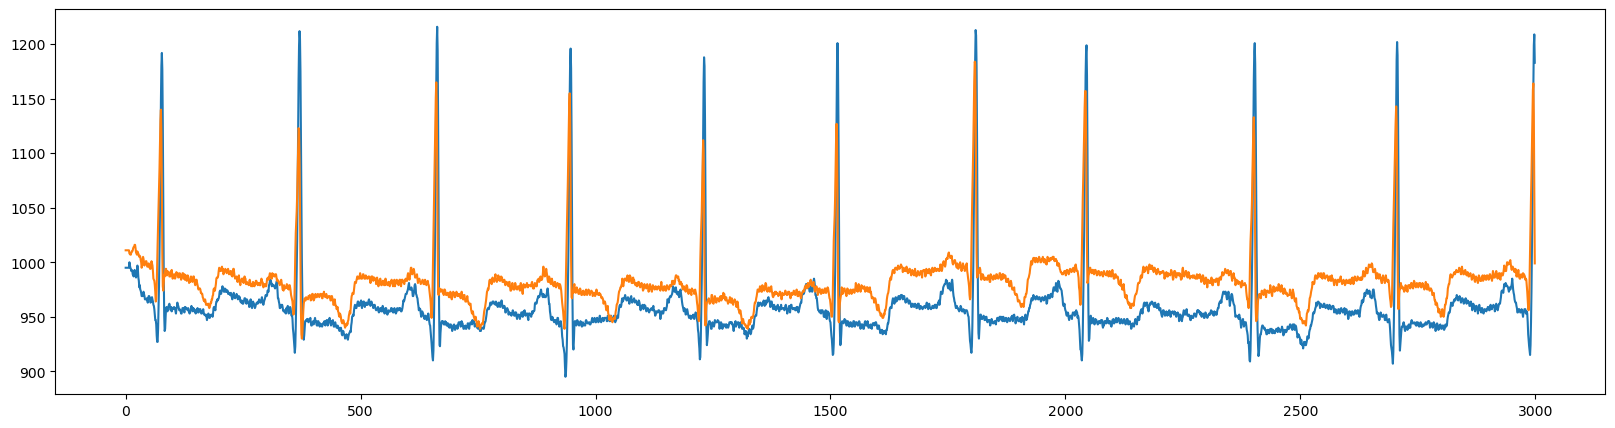

In [74]:
df1 = df[df.index < 3000]
# df1 = df1[df.index > 2000]
plt.figure(figsize=(20,5))
plt.plot(df1['\'sample #\''], df1['\'MLII\''])
plt.plot(df1['\'sample #\''], df1['\'V5\''])

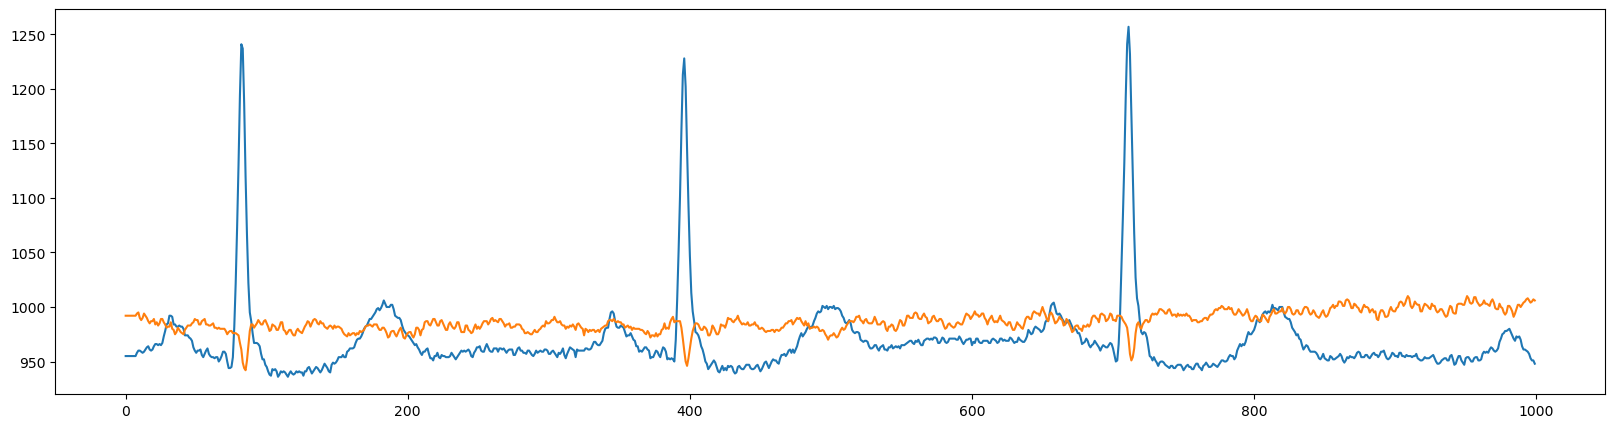

In [28]:
df3 = df2[df.index < 1000]
plt.figure(figsize=(20,5))
plt.plot(df3['\'sample #\''], df3['\'MLII\''])
plt.plot(df3['\'sample #\''], df3['\'V1\''])

In [13]:
df_annotations = pd.read_table(r'data\100annotations.txt',sep='\s+', engine='python')
df_annotations.head(20)

,Time,Sample#,Type,Sub,Chan,Num,Aux
0,0:00.050,18,+,0,0,0,(N
1,0:00.214,77,N,0,0,0,None
2,0:01.028,370,N,0,0,0,None
3,0:01.839,662,N,0,0,0,None
4,0:02.628,946,N,0,0,0,None
5,0:03.419,1231,N,0,0,0,None
6,0:04.208,1515,N,0,0,0,None
7,0:05.025,1809,N,0,0,0,None
8,0:05.678,2044,A,0,0,0,None
9,0:06.672,2402,N,0,0,0,None


In [62]:
df_data = pd.read_csv(r'data\100.csv', sep=",")
df_data.head(5)

,'sample #','MLII','V5'
0,0,995,1011
1,1,995,1011
2,2,995,1011
3,3,995,1011
4,4,995,1011


In [63]:
# удаляем столбец
df_data.drop (columns=df_data.columns [2], axis= 1 , inplace= True )
df_data.head(5)

,'sample #','MLII'
0,0,995
1,1,995
2,2,995
3,3,995
4,4,995


In [64]:
df_data['Type'] = np.nan
df_data['heart_beat'] = np.nan
df_data.head(5)

,'sample #','MLII',Type,heart_beat
0,0,995,NaN,NaN
1,1,995,NaN,NaN
2,2,995,NaN,NaN
3,3,995,NaN,NaN
4,4,995,NaN,NaN


In [58]:
last_sample = 0
for i in range(len(df_annotations)+1):

    for g in range(last_sample, df_annotations.iloc[i]['Sample#']):

        if i == 0:
            df_data.loc[g,'Type'] = 'N'
            df_data.loc[g,'№_heart_beat'] = i
        else:
            df_data.loc[g,'Type'] = df_annotations.iloc[i]['Type']
            df_data.loc[g,'№_heart_beat'] = i
    
    last_sample = df_annotations.iloc[i]['Sample#']

df_data

KeyboardInterrupt: 

In [66]:
df_data.to_csv(r'data\MLII\100MLII.csv', sep=',', index=False)

In [75]:
number = 100
path = f"data\MLII\{number}MLII.csv"
df_data.to_csv(path, sep=',', index=False)

In [65]:
last_sample = 0
i=0 
for i in range(len(df_annotations)):


    if i < 2:
        for g in range(last_sample, df_annotations.iloc[i]['Sample#']):
            df_data.loc[g,'Type'] = df_annotations.iloc[i]['Type']
            df_data.loc[g,'heart_beat'] = i
    
    else:

        j = i -1
        for g in range(last_sample, df_annotations.iloc[i]['Sample#']):
            df_data.loc[g,'Type'] = df_annotations.iloc[j]['Type']
            df_data.loc[g,'heart_beat'] = i

    last_sample = df_annotations.iloc[i]['Sample#']
    last_type = df_annotations.iloc[i]['Type']

for i in range(last_sample, len(df_data)):
    df_data.loc[i,'Type'] = last_type
    df_data.loc[i,'heart_beat'] = df_data.loc[last_sample-1,'heart_beat']+1

df_data

,'sample #','MLII',Type,heart_beat
0,0,995,+,0.0
1,1,995,+,0.0
2,2,995,+,0.0
3,3,995,+,0.0
4,4,995,+,0.0
...,...,...,...,...
649995,649995,1009,N,2274.0
649996,649996,935,N,2274.0
649997,649997,889,N,2274.0
649998,649998,871,N,2274.0


In [37]:
last_sample = 0
for i in range(len(df_annotations)+1):

    if i == (len(df_annotations)+1):

        j = i -1
        for g in range(last_sample, len(df_data)):
            df_data.loc[g,'Type'] = df_annotations.iloc[j]['Type']
            df_data.loc[g,'№_heart_beat'] = i 
    else:

        if i < 2:
            for g in range(last_sample, df_annotations.iloc[i]['Sample#']):
                df_data.loc[g,'Type'] = df_annotations.iloc[i]['Type']
                df_data.loc[g,'№_heart_beat'] = i
            continue

        j = i -1
        for g in range(last_sample, df_annotations.iloc[i]['Sample#']):
            df_data.loc[g,'Type'] = df_annotations.iloc[j]['Type']
            df_data.loc[g,'№_heart_beat'] = i

        last_sample = df_annotations.iloc[i]['Sample#']

df_data

IndexError: single positional indexer is out-of-bounds

In [33]:
number = 100
path = f"data\{number}.csv"
df_data = pd.read_csv(path, sep=",")
df_data.head(5)

,'sample #','MLII','V5'
0,0,995,1011
1,1,995,1011
2,2,995,1011
3,3,995,1011
4,4,995,1011


In [ ]:
number = 100
path = f"data\{number}.csv"

In [35]:
df_number_csv = pd.DataFrame({'number': [101, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 113, 114 , 115, 116, 117, 118, 119, 121, 122, 123 , 124, 200, 201, 202, 203, 205, 207, 208, 209, 210, 212, 213, 214, 215,  217, 219, 220, 221, 222, 223, 228, 230, 231, 232, 233, 234]})
df_number_csv


,number
0,101
1,102
2,103
3,104
4,105
5,106
6,107
7,108
8,109
9,111
